In [1]:
import numpy as np

In [2]:
import yt
import trident
import unyt

# Parameters

In [3]:
# Filetree
snapshot_fp = '/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12i_r7100/output/snapdir_277/snapshot_277.0.hdf5'
ray_fp = './data/trident_ray.h5'
spectrum_fp = './data/trident_spectrum.h5'
spectrum_plot_fp = './data/trident_spectrum.pdf'

In [4]:
# Manual input of halo data parameters.
# Get these however you would normally.
# All units in kpc.
r_vir = 262.
halo_center = np.array([21203.73992905, 21635.62597137, 22624.56860757])
z_hat = np.array([-0.10450846,  0.66726057, -0.73745597])
x_hat = np.cross( z_hat, [ 0, 1, 0 ] )
x_hat /= np.linalg.norm( x_hat )

In [5]:
# Sightline parameters.
# Sightline is impact_parameter offset from the center along the z-axis,
# runs perpendicular to the z-axis,
# and has a length of path_length.
impact_parameter = 0.1 * r_vir
path_length = 0.6 * r_vir
sl_center = halo_center + impact_parameter * z_hat
sl_start = sl_center - path_length / 2. * x_hat
sl_end = sl_center + path_length / 2. * x_hat

In [6]:
# Other parameters
line_list = ['H', 'C', 'N', 'O', 'Mg']

# Generate Mock Observation

In [7]:
# Load the simulation data
ds = yt.load( snapshot_fp )

yt : [INFO     ] 2023-01-24 21:01:43,423 Calculating time from 5.000e-01 to be 1.890e+17 seconds
yt : [INFO     ] 2023-01-24 21:01:43,424 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-01-24 21:01:43,483 Parameters: current_time              = 1.8897164778779648e+17 s
yt : [INFO     ] 2023-01-24 21:01:43,484 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-01-24 21:01:43,485 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 21:01:43,485 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2023-01-24 21:01:43,486 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 21:01:43,486 Parameters: current_redshift          = 1.000000008126844
yt : [INFO     ] 2023-01-24 21:01:43,486 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2023-01-24 21:01:43,487 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2023-01-24 21:01:43,487 Parameters: omega_radiation 

In [8]:
# Get the simulation kpc unit.
# This avoids a bug that sometimes pops up.
kpc = ds.quan( 1, 'kpc' )

In [9]:
ray = trident.make_simple_ray(
    ds,
    start_position = sl_start * kpc,
    end_position = sl_end * kpc,
    data_filename = ray_fp,
    lines = line_list,
)

yt : [INFO     ] 2023-01-24 21:01:43,873 Allocating for 1.466e+08 particles
Initializing coarse index : 100%|██████████| 270/270 [00:21<00:00, 12.49it/s]
yt : [INFO     ] 2023-01-24 21:02:05,508 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 270/270 [00:57<00:00,  4.68it/s]
yt : [INFO     ] 2023-01-24 21:03:05,435 Getting segment at z = 1.000000008126844: [0.4942824  0.50668273 0.52922086] unitary to [0.49792449 0.50668273 0.52870472] unitary.
/work2/03057/zhafen/stampede2/miniconda3/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
yt : [INFO     ] 2023-01-24 21:03:05,440 Getting subsegment: [unyt_quantity(0.4942824, 'unitary'), unyt_quantity(0.50668273, 'unitary'), unyt_quantity(0.52922086, 'unitary')] to [unyt_quantity(0.49792449, 'unitary'), unyt_quantity(0.50668273, 'unitary'), unyt_quantity(0.52870472, 'unitary')].
/work2/03057/zhafen/stampede2/yt/yt/data_objects/data_containe

In [10]:
sg = trident.SpectrumGenerator( 'COS' )
sg.make_spectrum(
    ray,
    lines = line_list,
    store_observables = True,
)

yt : [INFO     ] 2023-01-24 21:07:56,447 Setting instrument to COS
yt : [INFO     ] 2023-01-24 21:07:56,466 Allocating for 1.928e+03 particles
/work2/03057/zhafen/stampede2/yt/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'H_p0_number_density' is ambiguous and corresponds to any one of the following field types:
 {'all', 'gas'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("all", "H_p0_number_density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
yt : [INFO     ] 2023-01-24 21:07:57,735 Creating C_p0_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2023-01-24 21:07:57,769 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2023-01-24 21:07:57,796 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2023-01-24 21:07:57,818 Creating 

In [11]:
# Plot and save the spectrum
sg.save_spectrum( spectrum_fp )
sg.plot_spectrum( spectrum_plot_fp )

yt : [INFO     ] 2023-01-24 21:08:37,543 Writing spectrum to hdf5 file: ./data/trident_spectrum.h5.
yt : [INFO     ] 2023-01-24 21:08:37,565 Writing spectrum plot to png file: ./data/trident_spectrum.pdf


In [12]:
# Additional useful information is stored here.
sg.line_observables_dict

{'Ly a': {'column_density': unyt_array([1.14219127e+05, 2.98945912e+10, 2.65142559e+09, ...,
              3.18156655e+07, 1.13996052e+07, 2.79339777e+09], 'cm**(-2)'),
  'tau_ray': array([0., 0., 0., ..., 0., 0., 0.]),
  'EW': unyt_quantity(0., 'Å'),
  'delta_lambda': unyt_array([1215.51074013, 1215.29439304, 1215.28951788, ...,
              1213.79332995, 1213.789313  , 1213.72905917], 'dimensionless*Å'),
  'lambda_obs': unyt_array([2431.18074013, 2430.96439304, 2430.95951788, ...,
              2429.46332995, 2429.459313  , 2429.39905917], 'Å'),
  'thermal_b': unyt_array([1.11454164e-05, 1.10164444e-05, 1.05128618e-05, ...,
              1.23121913e-05, 1.10376394e-05, 1.23653888e-05], 'sqrt(erg)/sqrt(amu)'),
  'thermal_width': unyt_array([0.70140412, 0.69322595, 0.66153595, ..., 0.77428433,
              0.69412965, 0.77760922], 'Å')},
 'Ly b': {'column_density': unyt_array([1.14219127e+05, 2.98945912e+10, 2.65142559e+09, ...,
              3.18156655e+07, 1.13996052e+07, 2.793397

# Plot Ray Properties

In [13]:
# Get property fields
temp = ray.r[('gas', 'temperature')]
metallicity = ray.r[('gas', 'O_metallicity')]
mg_II_density = ray.r[('gas', 'Mg_p1_number_density')]

In [14]:
# Get coordinates and convert to relevant frame
coords = np.array([ ray.r[('gas', _)].to( 'kpc' ) for _ in ( 'x', 'y', 'z' ) ]).transpose()
coords -= sl_center
d_along_sightline = np.dot( coords, x_hat )

In [15]:
import matplotlib
import matplotlib.pyplot as plt

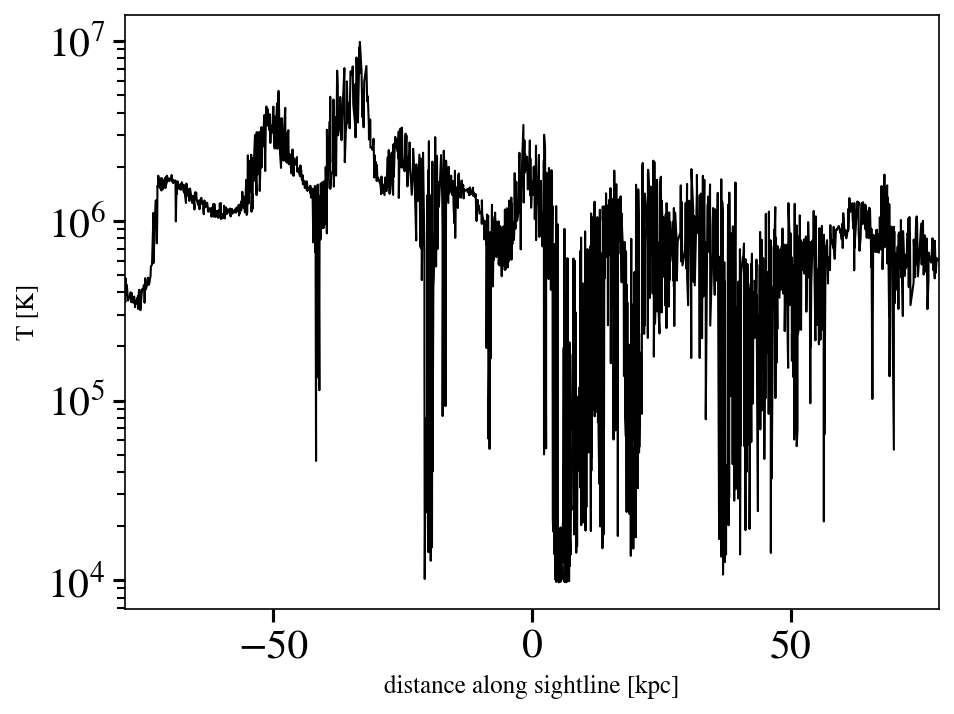

In [16]:
fig = plt.figure()
ax = plt.gca()

ax.plot(
    d_along_sightline,
    temp,
    linewidth = 1,
    color = 'k',
)

ax.set_yscale( 'log' )
ax.set_xlim( - path_length / 2., path_length / 2. )

ax.set_xlabel( 'distance along sightline [kpc]' )
ax.set_ylabel( 'T [K]' )

plt.savefig( './data/trident_temp_plot.pdf' )